# Lectura de DataFrame Filtrado

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('datos_filtrados.csv', index_col=0)
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATE,ITEM,SEGMENT,REGION,BRAND,ITEM_DESCRIPTION,FORMAT,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES
0,2022-01-09,0000075000592,BLEACH,TOTAL AUTOS AREA 1,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,LIQUIDO,0.016,0.072,2.667
1,2022-01-09,0000075000592,BLEACH,TOTAL AUTOS AREA 2,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,LIQUIDO,0.042,0.190,21.000
2,2022-01-09,0000075000592,BLEACH,TOTAL AUTOS AREA 3,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,LIQUIDO,0.016,0.072,8.000
3,2022-01-09,0000075000592,BLEACH,TOTAL AUTOS AREA 4,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,LIQUIDO,0.196,0.882,14.000
4,2022-01-09,0000075000592,BLEACH,TOTAL AUTOS AREA 5,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,LIQUIDO,0.020,0.090,5.000
...,...,...,...,...,...,...,...,...,...,...
121997,2023-07-17,8411660210036,PRETREAT,TOTAL AUTOS AREA 3,IBERIA,IBERIA REVOLUTION QUITA MANCHAS ACCIDENTALES B...,LIQUIDO,0.084,5.665,2.702
121998,2023-07-17,8411660210036,PRETREAT,TOTAL AUTOS AREA 4,IBERIA,IBERIA REVOLUTION QUITA MANCHAS ACCIDENTALES B...,LIQUIDO,0.077,5.007,2.139
121999,2023-07-17,8411660210036,PRETREAT,TOTAL AUTOS AREA 5,IBERIA,IBERIA REVOLUTION QUITA MANCHAS ACCIDENTALES B...,LIQUIDO,0.141,9.476,2.655
122000,2023-07-17,8411660210036,PRETREAT,TOTAL AUTOS AREA 6,IBERIA,IBERIA REVOLUTION QUITA MANCHAS ACCIDENTALES B...,LIQUIDO,0.042,2.935,2.211


## Total del Unidades Vendidas de acuerdo a cada categoría

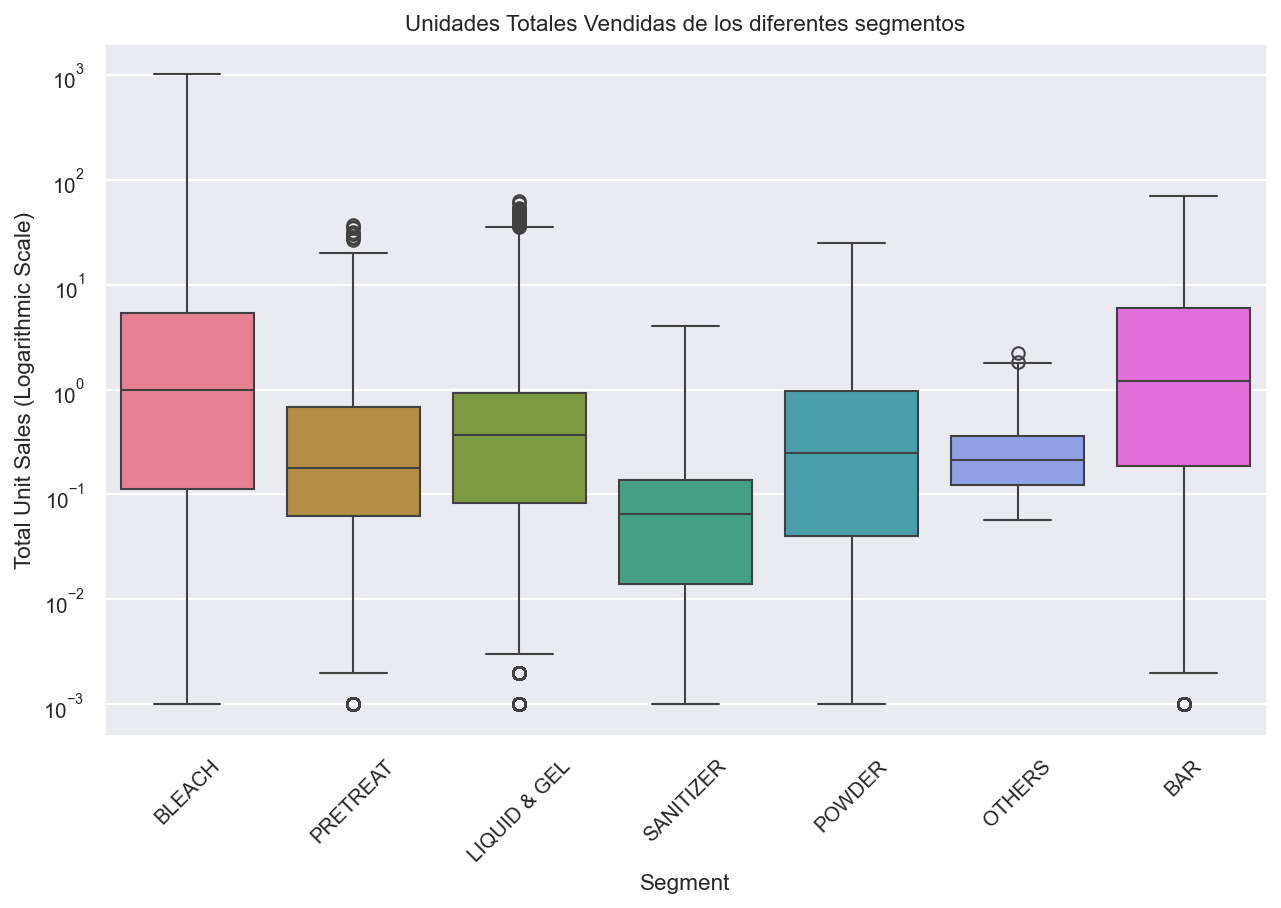

In [44]:
# Boxplot con Escala Logaritmica para reflejar el total de unidades vendidas de cada categoria
sns.set(rc={"figure.dpi":150})
sns.set(rc = {"figure.figsize":(10,6)})
sns.set_style("darkgrid")
sns.set_context('notebook', font_scale = 0.9)

fig, ax = plt.subplots()
sns.boxplot(data = df, x = df['SEGMENT'], y = df['TOTAL_UNIT_SALES'], log_scale = (False, True), palette = 'husl', hue = df['SEGMENT'], legend=False)
ax.set(ylabel = 'Total Unit Sales (Logarithmic Scale)', xlabel = 'Segment')
plt.xticks(rotation = 45)
plt.title('Unidades Totales Vendidas de los diferentes segmentos')
fig.savefig("TotalUnits_Segments.png", dpi = 300, bbox_inches='tight')
plt.show()

#### Se puede observar que el segmento "Bleach" o como se le conoce en Latinoamerica "Cloro", en este caso "Blanqueador de Ropa", lideró las ventas totales, seguido de "los jabones en barra" y "liquidos y gel".

## Ventas a lo largo del tiempo

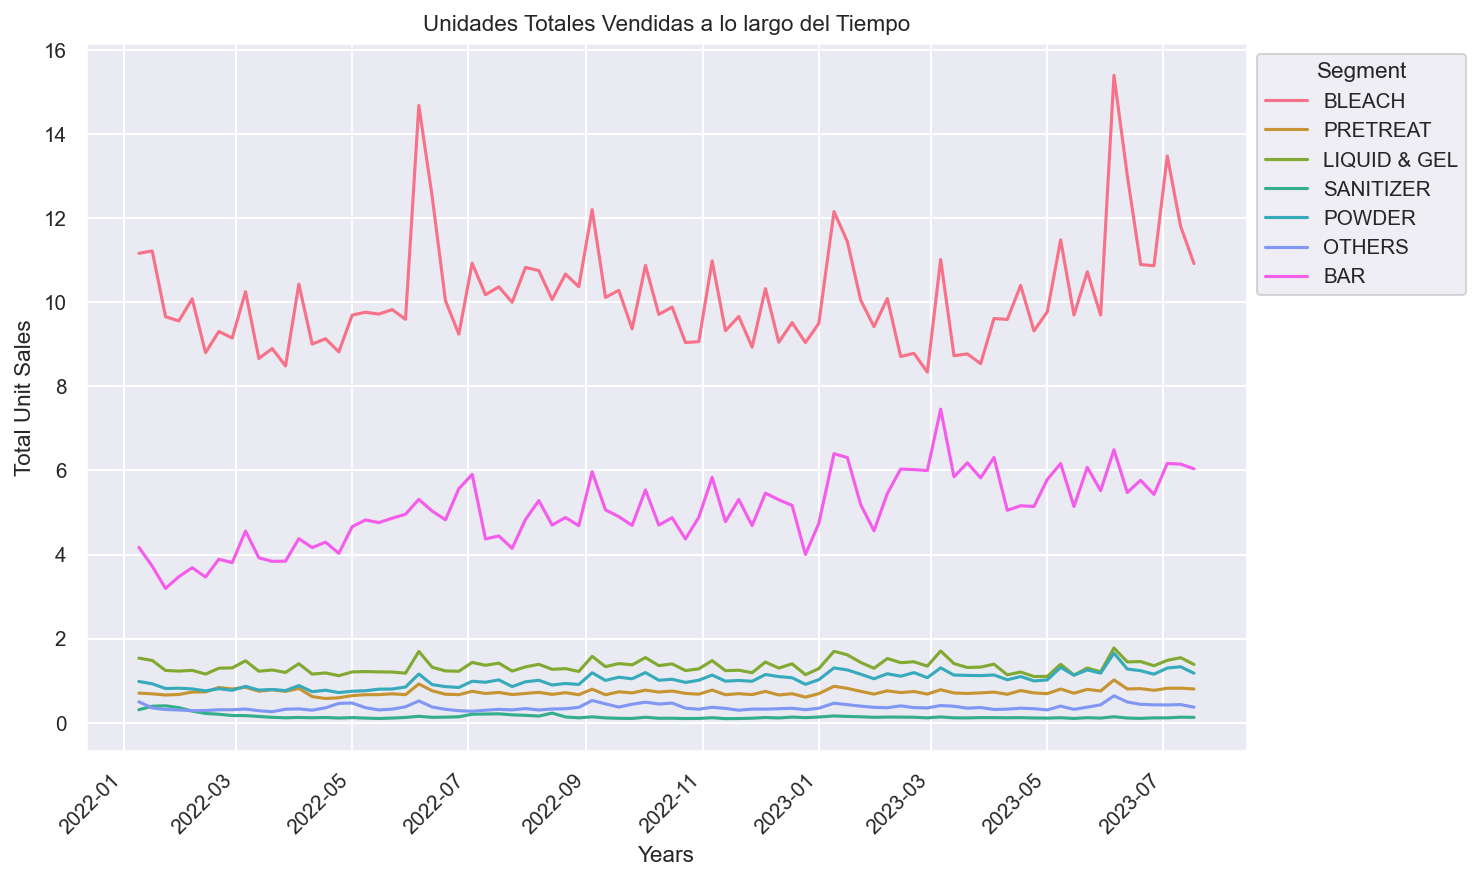

In [46]:
# Lineplot de acuerdo a las ventas y los diferentes segmentos
fig, ax = plt.subplots()
sns.set(rc={"figure.dpi":150})
sns.set(rc = {"figure.figsize":(10,6)})
sns.set_style("darkgrid")
sns.set_context('notebook', font_scale = 0.9)

sns.lineplot(x = 'DATE', y = 'TOTAL_UNIT_SALES', data = df, palette = 'husl', hue = df['SEGMENT'], legend = True, linewidth = 1.5, errorbar = None)
ax.set(xlabel = 'Years', ylabel = 'Total Unit Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Unidades Totales Vendidas a lo largo del Tiempo')
plt.legend(title='Segment', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
fig.savefig("TotalUnits_Segments_Time.png", dpi = 300, bbox_inches='tight')
plt.show()

#### Podemos comprobar que el segmento de "Blaqueador para ropa" (Bleach) lidera las ventas, seguido del formato "Barra."

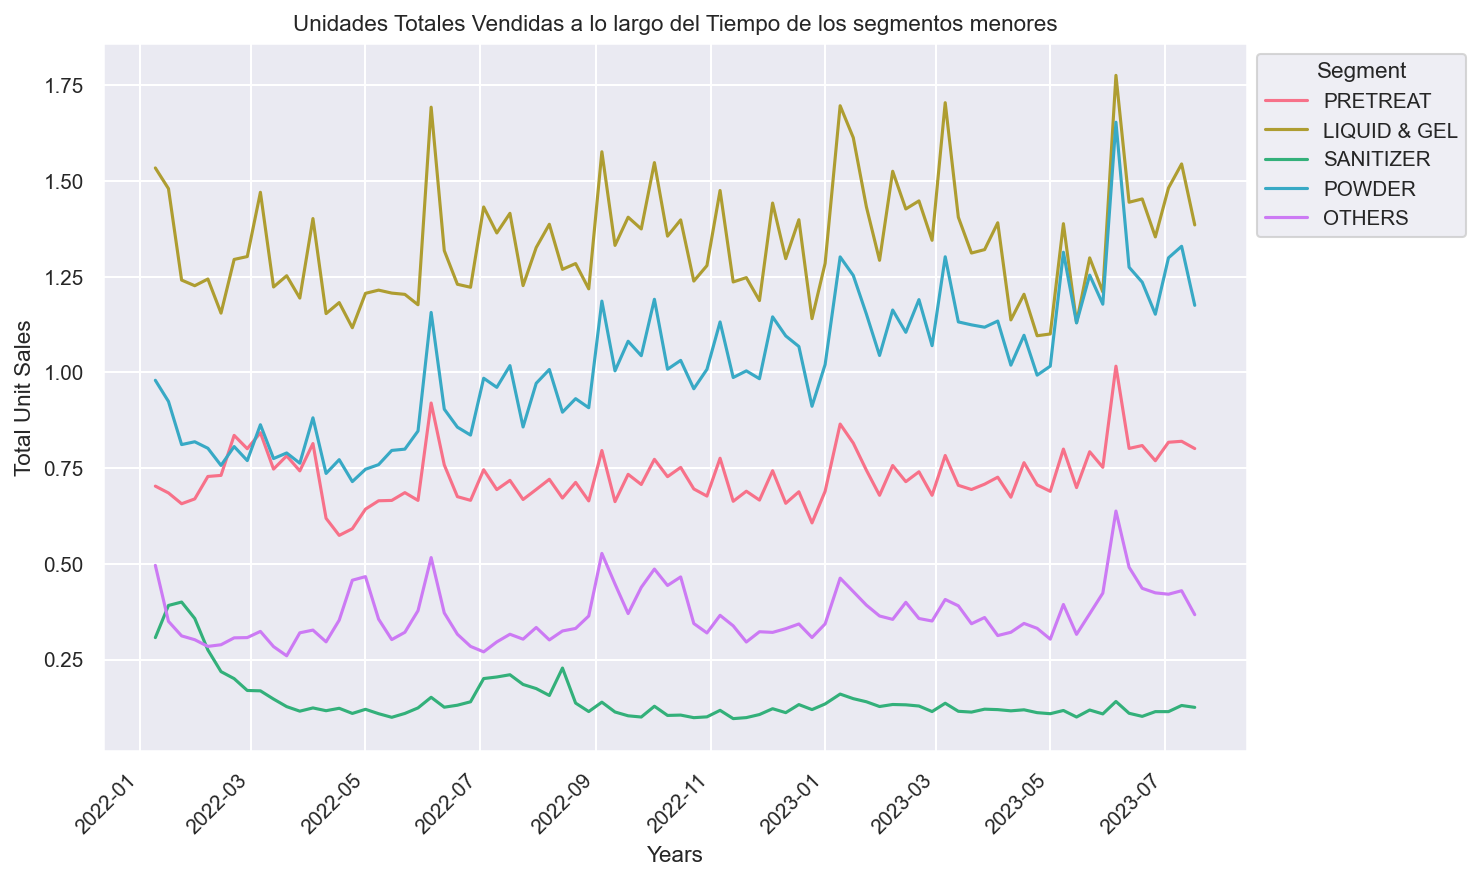

In [48]:
# Lineplot de acuerdo a las ventas y los diferentes segmentos menores
df_filtered = df.query("SEGMENT != 'BLEACH' and SEGMENT != 'BAR'")

fig, ax = plt.subplots()
sns.set(rc={"figure.dpi":150})
sns.set(rc = {"figure.figsize":(10,6)})
sns.set_style("darkgrid")
sns.set_context('notebook', font_scale = 0.9)

sns.lineplot(x = 'DATE', y = 'TOTAL_UNIT_SALES', data = df_filtered, palette = 'husl', hue = df_filtered['SEGMENT'], legend = True, linewidth = 1.5, errorbar = None)
ax.set(xlabel = 'Years', ylabel = 'Total Unit Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Unidades Totales Vendidas a lo largo del Tiempo de los segmentos menores')
plt.legend(title='Segment', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
fig.savefig("TotalUnits_MinorSegments_Time.png", dpi = 300, bbox_inches='tight')
plt.show()

#### En esta gráfica observamos los segmentos de menor venta, los cuales presentan diferencias de ventas entre si, pero mantienen un comportamiento similar, a excepción de los "Sanitizantes" (Sanitizer) los cuales se mantuvieron más estables a partir de la fecha "2022-03".

#### Liquidos y Gel tuvieron un emparejamiento en ventas entre el periodo "2023-05 - 2023-07"

## Relación entre Diferentes Variables

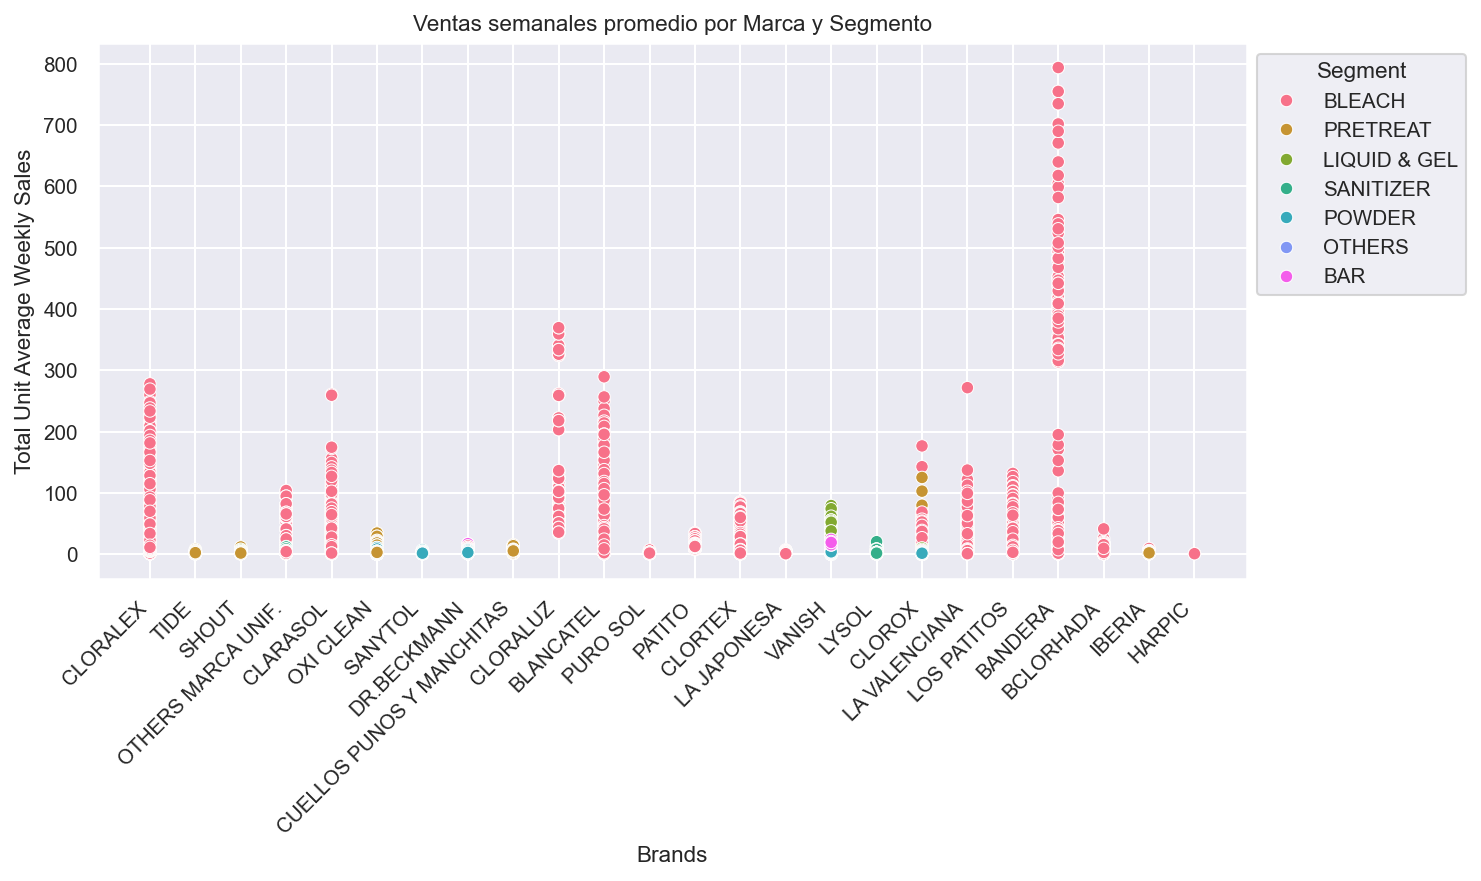

In [50]:
# Scatterplot del promedio de ventas semanales totales por marca y segmento
fig, ax = plt.subplots()
sns.set(rc={"figure.dpi":150})
sns.set(rc = {"figure.figsize":(10,6)})
sns.set_style("darkgrid")
sns.set_context('notebook', font_scale = 0.9)

sns.scatterplot(x = 'BRAND', y = 'TOTAL_UNIT_AVG_WEEKLY_SALES', data = df, palette = 'husl', hue = 'SEGMENT', legend = True)
ax.set(xlabel = 'Brands', ylabel = 'Total Unit Average Weekly Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Ventas semanales promedio por Marca y Segmento')
plt.legend(title='Segment', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
fig.savefig("WeekUnits_Segments_Brands.png", dpi = 300, bbox_inches='tight')
plt.show()

#### Podemos observar que el blanqueador de ropa de la marca "Bandera" tuvo un mejor desempeño en cuanto a sus ventas semanales. "Harpic" en cambio, parece ser la marca de blanqueador de ropa que menos desempeño tuvo en este intervalo semanal.

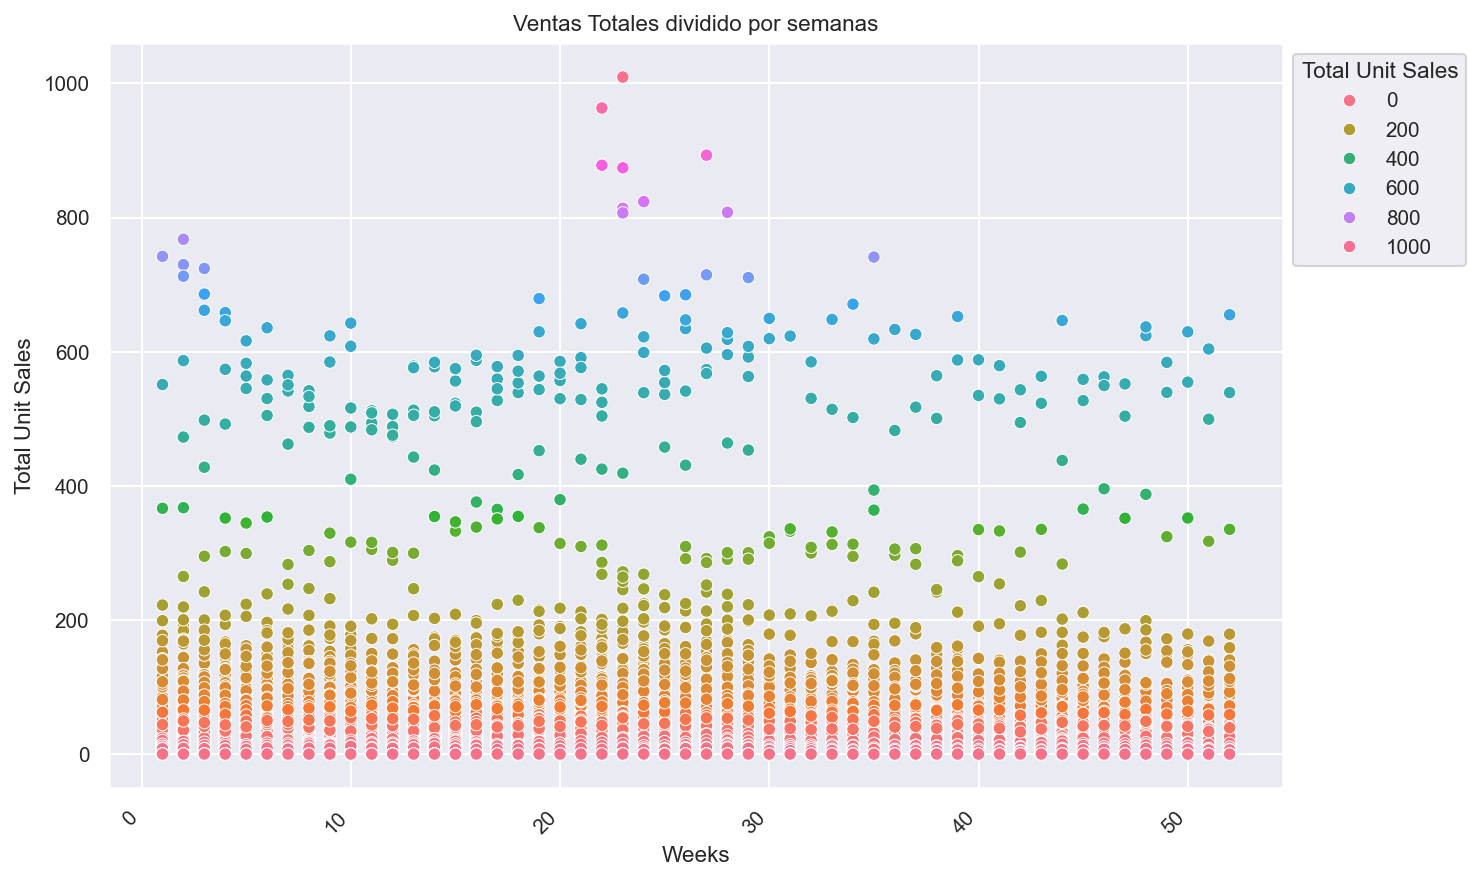

In [52]:
# Scatterplot de las ventas por semana contra las ventas totales
df['WEEK'] = pd.to_datetime(df['DATE']).dt.isocalendar().week

fig, ax = plt.subplots()
sns.set(rc={"figure.dpi":150})
sns.set(rc = {"figure.figsize":(10,6)})
sns.set_style("darkgrid")
sns.set_context('notebook', font_scale = 0.9)

sns.scatterplot(x = 'WEEK', y = 'TOTAL_UNIT_SALES', data = df, palette = 'husl', hue = 'TOTAL_UNIT_SALES', legend = True)
ax.set(xlabel = 'Weeks', ylabel = 'Total Unit Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Ventas Totales dividido por semanas')
plt.legend(title='Total Unit Sales', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
fig.savefig("TotalUnits_Weeks.png", dpi = 300, bbox_inches='tight')
plt.show()

#### Se puede apreciar un despegue de ventas entre las semanas 20 y 30, siendo la semana 24 la más fuerte.

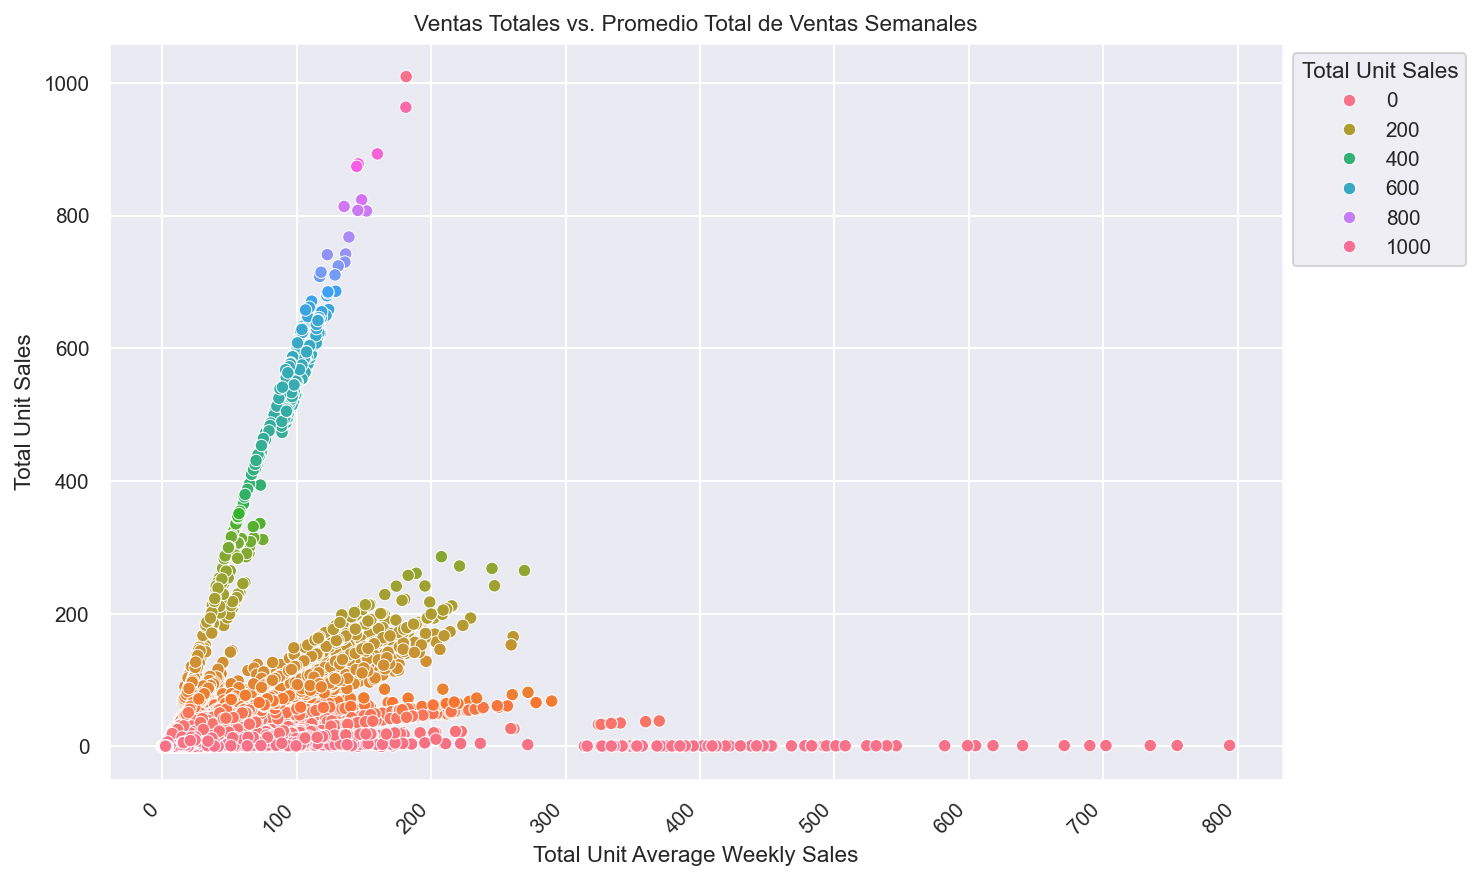

In [54]:
# Scatterplot del promedio de ventas semanales totales y el total de ventas
fig, ax = plt.subplots()
sns.set(rc={"figure.dpi":150})
sns.set(rc = {"figure.figsize":(10,6)})
sns.set_style("darkgrid")
sns.set_context('notebook', font_scale = 0.9)

sns.scatterplot(x = 'TOTAL_UNIT_AVG_WEEKLY_SALES', y = 'TOTAL_UNIT_SALES', data = df, palette = 'husl', hue = 'TOTAL_UNIT_SALES', legend = True)
ax.set(xlabel = 'Total Unit Average Weekly Sales', ylabel = 'Total Unit Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Ventas Totales vs. Promedio Total de Ventas Semanales')
plt.legend(title='Total Unit Sales', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
fig.savefig("TotalUnits_vs_WeekUnits.png", dpi = 300, bbox_inches='tight')
plt.show()

## Ventas Por Region

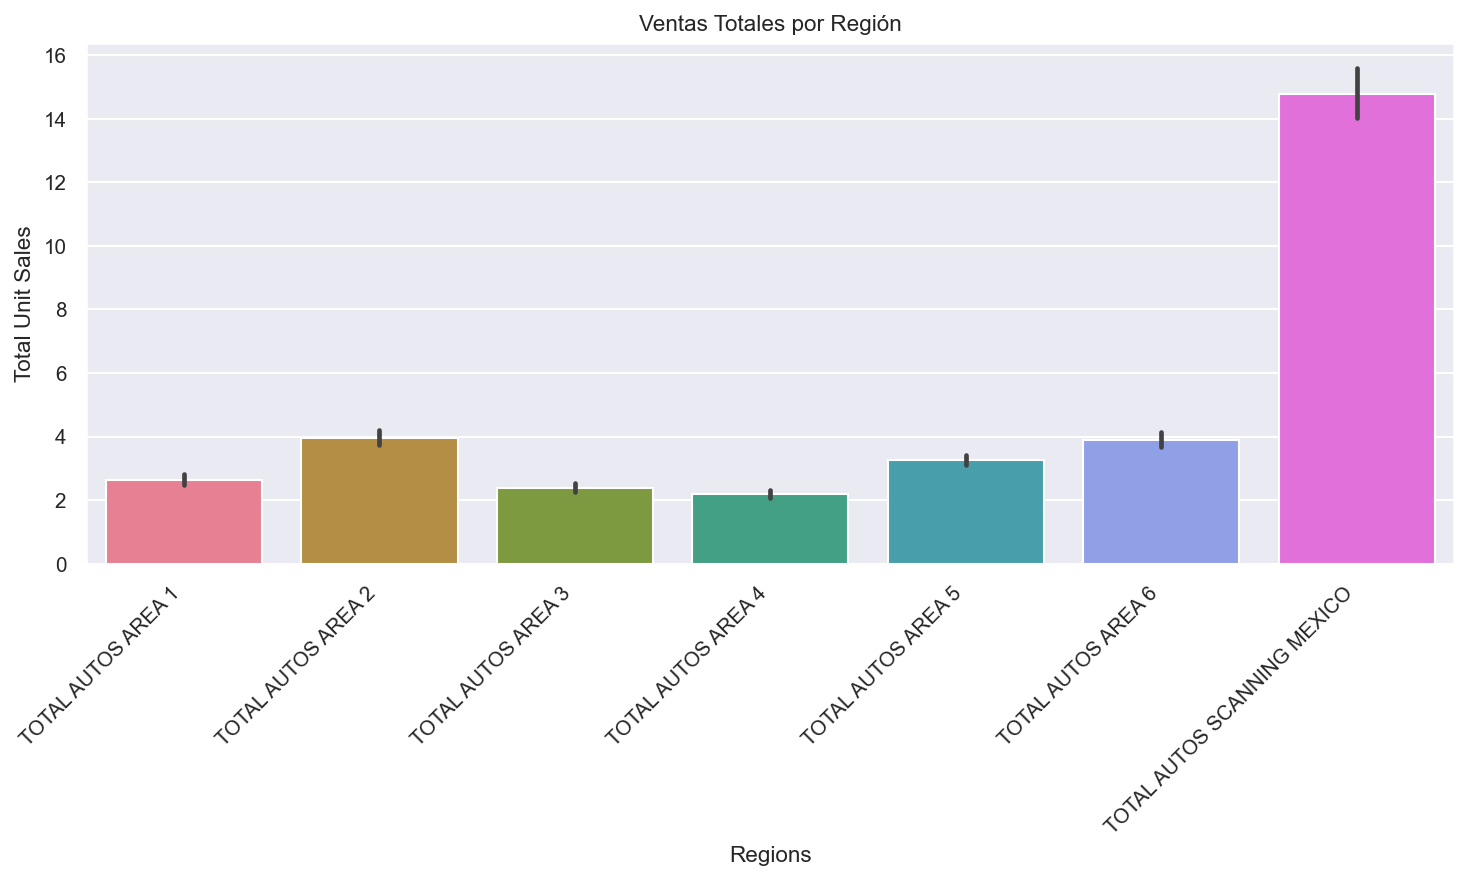

In [56]:
# Barplot del total de ventas por region
fig, ax = plt.subplots()
sns.set(rc={"figure.dpi":150})
sns.set(rc = {"figure.figsize":(10,6)})
sns.set_style("darkgrid")
sns.set_context('notebook', font_scale = 0.9)

sns.barplot(x = 'REGION', y = 'TOTAL_UNIT_SALES', data = df, palette = 'husl', hue = 'REGION')
ax.set(xlabel = 'Regions', ylabel = 'Total Unit Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Ventas Totales por Región')
plt.tight_layout()
fig.savefig("TotalRegion_Sales.png", dpi = 300, bbox_inches='tight')
plt.show()

### Se puede observar como la Región "Total Autos Scanning México" tiene el mejor desempeño de ventas, seguido de "Total Autos Area 2." Como menor desempeño tenemos a "Total Autos Area 4."

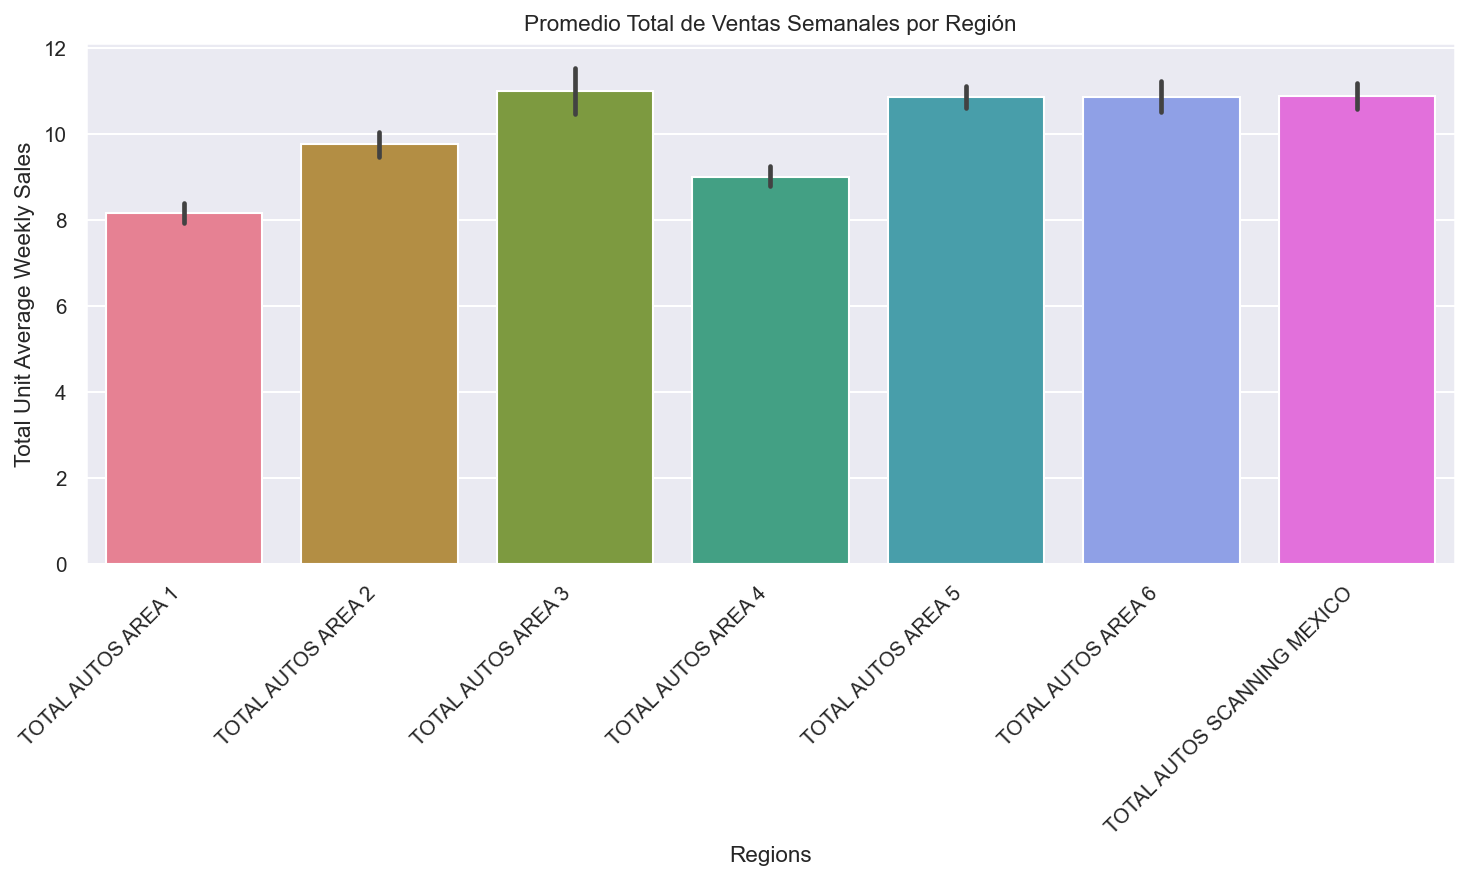

In [58]:
# Barplot del total de ventas por semana por región
fig, ax = plt.subplots()
sns.set(rc={"figure.dpi":150})
sns.set(rc = {"figure.figsize":(10,6)})
sns.set_style("darkgrid")
sns.set_context('notebook', font_scale = 0.9)

sns.barplot(x = 'REGION', y = 'TOTAL_UNIT_AVG_WEEKLY_SALES', data = df, palette = 'husl', hue = 'REGION')
ax.set(xlabel = 'Regions', ylabel = 'Total Unit Average Weekly Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Promedio Total de Ventas Semanales por Región')
plt.tight_layout()
fig.savefig("TotalRegion_Weekly_Sales.png", dpi = 300, bbox_inches='tight')
plt.show()

#### En este gráfico observamos que aunque el desempeño total de la región "Total Autos Scanning México" supero por mucho a las demás regiones en desempeño total, semanalmente mantiene un desempeño similar a las regiones "Total Autos Area 5 y 6", siendo superada por "Total Autos Area 3." Se puede comprobar que "Total Autos Area 4" maneja un desempeño bajo en general.

## Identificación de posibles Outliers y Anomalías

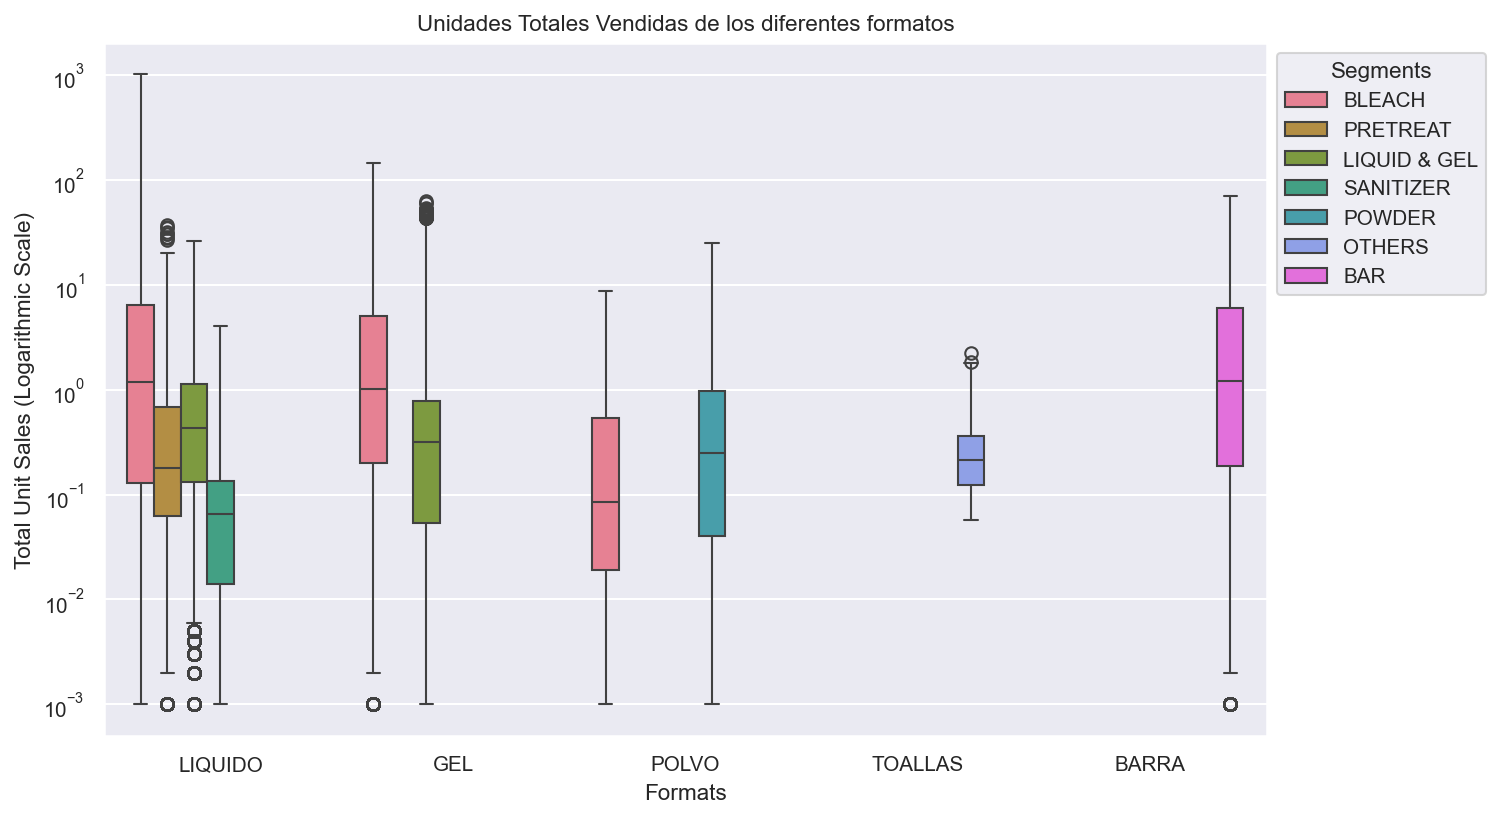

In [60]:
# Boxplot para la visualización de ventas totales de los diferentes formatos
sns.set(rc={"figure.dpi":150})
sns.set(rc = {"figure.figsize":(10,6)})
sns.set_style("darkgrid")
sns.set_context('notebook', font_scale = 0.9)

fig, ax = plt.subplots()
sns.boxplot(data = df, x = 'FORMAT', y = 'TOTAL_UNIT_SALES', log_scale = (False, True), palette = 'husl', hue = df['SEGMENT'], legend=True)
ax.set(ylabel = 'Total Unit Sales (Logarithmic Scale)', xlabel = 'Formats')
plt.xticks()
plt.legend(title='Segments', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Unidades Totales Vendidas de los diferentes formatos')
fig.savefig("TotalSales_Formats_Outliers.png", dpi = 300, bbox_inches='tight')
plt.show()

#### En esta grafica podemos observar anomalias en cuanto a las ventas totales de lo que es el segmento "Pre-tratamiento" de ropa (Pretreat) en el formato de liquidos, asi como en "Liquidos y Geles". 

#### "Blanqueadores de ropa" en su formato de Gel presentan tambien ciertos datos inconsistentes.

#### Esto podria deberse a anomalias en los datos capturados.

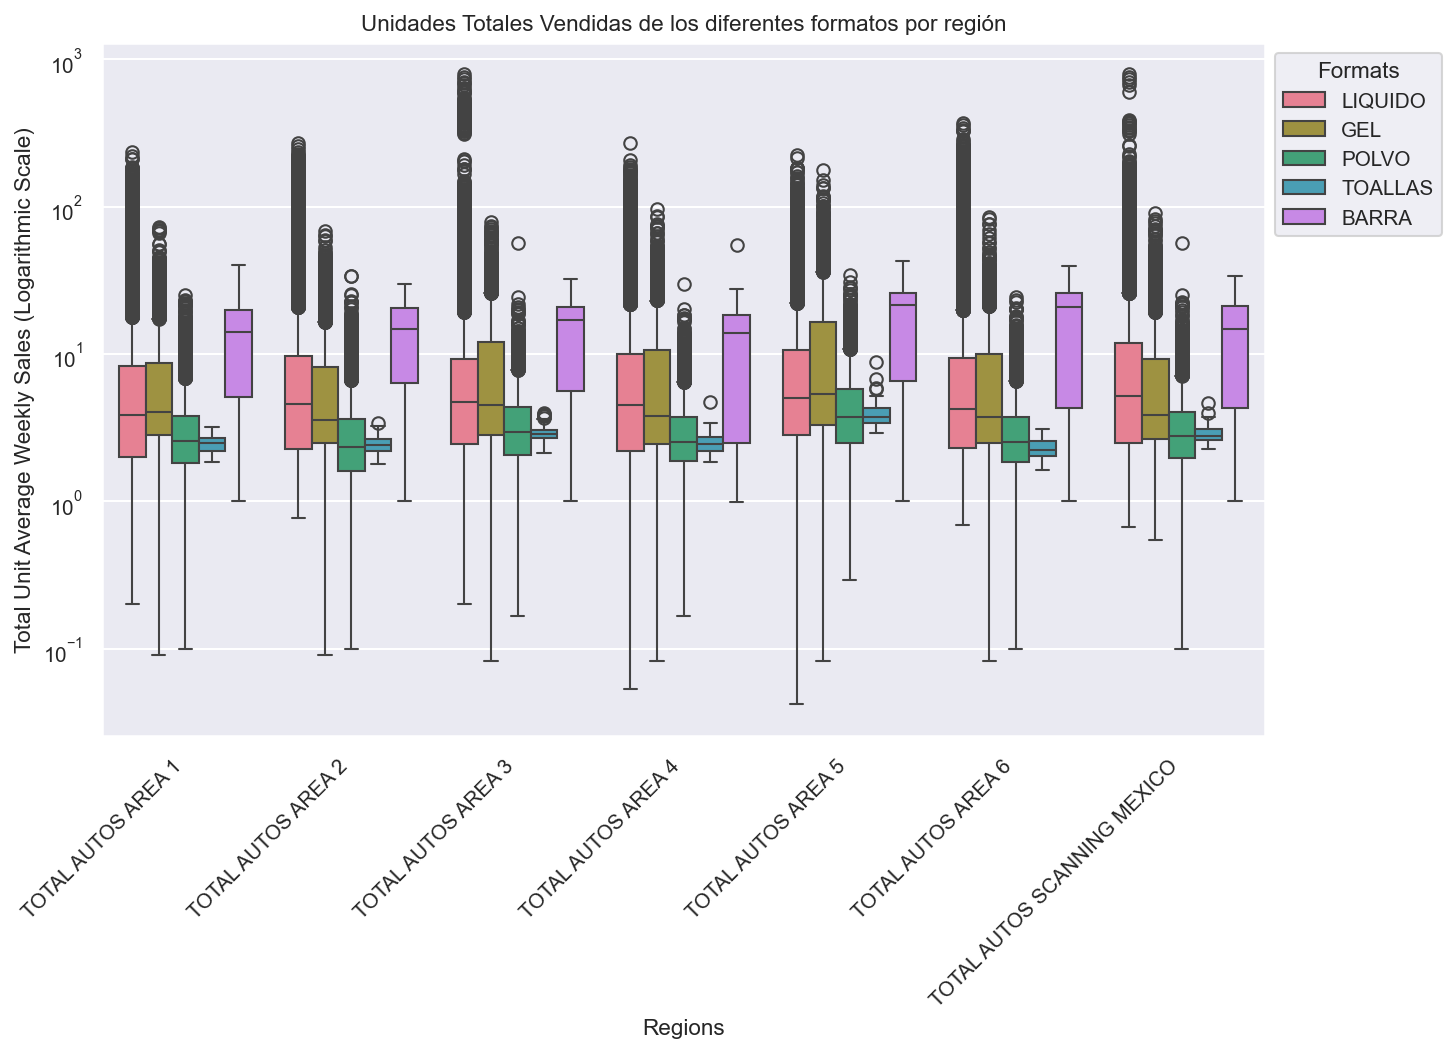

In [62]:
# Boxplot para la visualización del promedio de ventas semanales totales de los diferentes formatos en las diferentes regiones
sns.set(rc={"figure.dpi":150})
sns.set(rc = {"figure.figsize":(10,6)})
sns.set_style("darkgrid")
sns.set_context('notebook', font_scale = 0.9)

fig, ax = plt.subplots()
sns.boxplot(data = df, x = 'REGION', y = 'TOTAL_UNIT_AVG_WEEKLY_SALES', palette = 'husl', hue = df['FORMAT'], legend=True)
ax.set(ylabel = 'Total Unit Average Weekly Sales (Logarithmic Scale)', xlabel = 'Regions')
plt.yscale('log')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title='Formats', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Unidades Totales Vendidas de los diferentes formatos por región')
fig.savefig("TotalSales_Region_Outliers.png", dpi = 300, bbox_inches='tight')
plt.show()

#### Aquí podemos observar algunas anomalias presentes en cuanto a los datos de las Regiones y las ventas promedio semanales de los diferentes formatos. "Total Autos Area 3" y "Total Autos Scanning México" son los que presentan más Outliers.